In [1]:
# Import of the necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


from pca import pca

## Accuracy
from sklearn.metrics import mean_squared_error

## Building Model
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Data Visualization
import seaborn as sn
import matplotlib.pyplot as plt

## Multidimensional Scaling
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## 1) Lysozyme_rmsds.csv : Finding the relationship between different lysozyme

#### Description
Lysozyme is one of the most studied proteins. The given dataset contains a distance matrix of a selection of lysozyme structures from the Protein DataBank (PDB). Distances were determined as root-mean-square deviation (RMSD) after least-squares alignment using the CE align algorithm.


####  Multidimensional scaling (MDS)
A visual representation of distances or dissimilarities between sets of objects. Objects that are more similar (or have shorter distances) are closer together on the graph than objects that are less similar (or have longer distances). As well as interpreting dissimilarities as distances on a graph, MDS can also serve as a dimension reduction technique for high-dimensional data. (https://www.statisticshowto.com/multidimensional-scaling/)


#### Rationale for using the MDS method
Multidimensional scaling is a technic of transforming data into a lower dimension. Moreover, it keeps the same distances between points and reasonably preserves patterns and clusters. As we can see the given dataset contains a distance matrix of a selection of lysozyme structures. And the distances were determined as root-mean-square deviation (RMSD) after least-squares alignment. That is why the best way to analyzing of this dataset is Multisimentional Scaling (MDS). 

#### Expectations
I am expecting to see a clear separation between each group of lysozyme.

In [2]:
#Read the data
# df = pd.read_csv("lysozyme_rmsds.csv",header=0,index_col=0)
df = pd.read_csv("lysozyme_rmsds.csv")

df.shape

(172, 173)

In [3]:
df.head()
# df.tail()

,Unnamed: 0,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,1ta0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,5m1y,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,1flq,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,4ru1,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,1uia,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


The first column (Unnamed: 0) does not carry any significant information. So lets drop this column.

In [4]:
df=df.drop("Unnamed: 0", axis=1)
df.head()

,1ta0,5m1y,1flq,4ru1,1uia,3ma8,2zc6,4m53,1cwv,6nup,...,5dla,4u2a,6fe3,4ws6,225l,1l17,4zee,5hmj,4qdn,4x6p
0,0.000000,9.944671,10.914137,5.368414,10.147917,6.330169,13.397298,4.796260,6.708178,5.249331,...,10.748649,4.697932,6.442754,5.967243,6.613105,6.550033,10.885024,10.758552,10.531178,7.134530
1,9.944671,0.000000,0.351689,8.778090,0.360542,6.532751,6.447437,11.661980,10.892651,8.494948,...,0.450633,6.518186,10.142028,8.008221,5.411168,5.225135,0.423226,0.382607,4.660109,6.716681
2,10.914137,0.351689,0.000000,8.781974,0.201154,5.892352,6.476417,10.141856,8.676370,8.771998,...,0.300225,6.862653,8.398187,8.305965,5.385658,5.390587,0.312325,0.241490,4.646545,6.584307
3,5.368414,8.778090,8.781974,0.000000,8.802099,6.510888,11.596014,6.613473,6.483236,7.988591,...,10.002309,9.219876,8.978669,5.131378,8.586637,9.308215,7.545538,9.995192,11.135262,10.210994
4,10.147917,0.360542,0.201154,8.802099,0.000000,8.169978,6.458828,11.358191,10.635841,8.761022,...,0.296834,7.002353,11.221244,10.178038,5.404494,5.409590,0.333920,0.247616,4.522474,6.734468


Now lets check the missing or NULL data

In [5]:
print("Total missing data:", df.isna().sum().sum())

Total missing data: 0


There is no missing value in the dataset. 
For the next step, we don’t want to give more weight to some features only because their order of magnitude is higher than others’. A simple 0–1 normalization will solve this problem effectively.

In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)

There are several distance methods. **Manhattan distance** is usually preferred over the more common **Euclidean distance** when there is high dimensionality in the data. 

In [7]:
dist_manhattan = manhattan_distances(x_scaled)
dist_euclid = euclidean_distances(x_scaled)

Before putting components we must check how many components should we put. Let's check it in a different distance method!

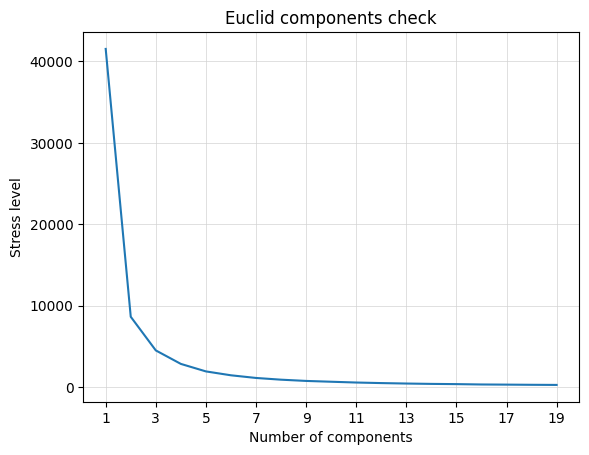

In [8]:
stress = []
max_range = 20
for dim in range(1, max_range):
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    mds.fit_transform(dist_euclid)
    stress.append(mds.stress_) 
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('Number of components')
plt.ylabel('Stress level')
plt.title("Euclid components check")
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()


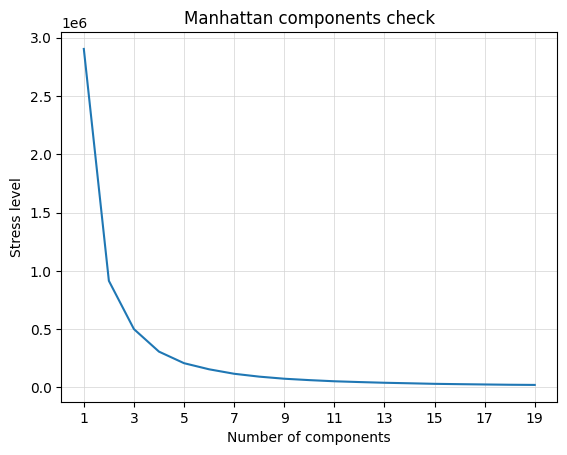

In [9]:
stress = []
max_range = 20
for dim in range(1, max_range):
    mds = MDS(n_components=dim, dissimilarity='precomputed', random_state=0)
    mds.fit_transform(dist_manhattan)
    stress.append(mds.stress_)
plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('Number of components')
plt.ylabel('Stress level')
plt.title("Manhattan components check")
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

From the above graphs, we can see that both components can perform well. I will try both components for the further steps.

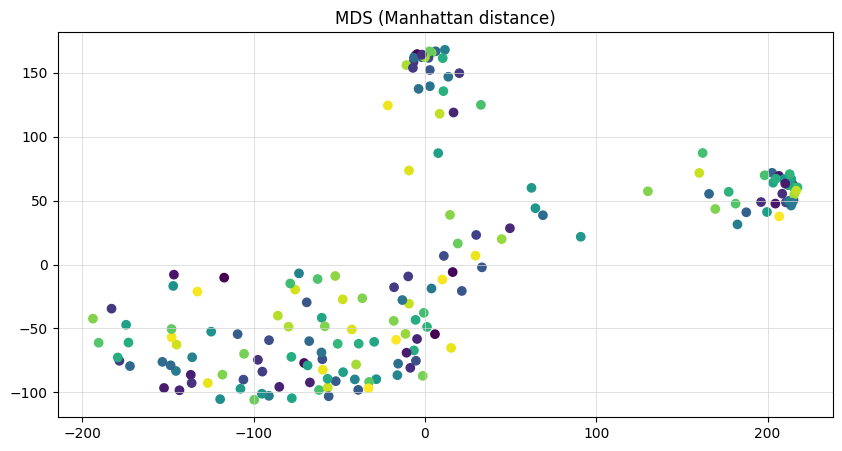

In [10]:
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(dist_manhattan)

N = len(x_sklearn[:,0])
colors = np.random.rand(N)

plt.figure(figsize=(10, 5))

plt.scatter(x_sklearn[:,0], x_sklearn[:,1], c=colors)

plt.title('MDS (Manhattan distance)')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)

plt.show()

From the above graph we can see, there are some lysozyme structures close to each other in **upper-left, upper-right, and middle-right**. That means they have a similar structure. The closer the lysozyme is, the function closer it will be.

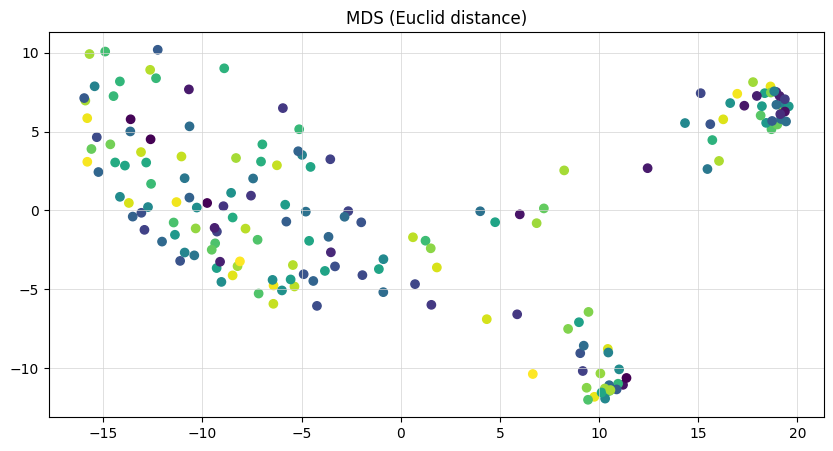

In [11]:
mds_sklearn = MDS(n_components=2)
x_sklearn = mds_sklearn.fit_transform(dist_euclid)

N = len(x_sklearn[:,0])
colors = np.random.rand(N)

plt.figure(figsize=(10, 5))

plt.scatter(x_sklearn[:,0], x_sklearn[:,1], c=colors)

plt.title('MDS (Euclid distance)')
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)

plt.show()

Again we can see from the graph, bottom-left, bottom-right, and upper-left, there are some lysozyme structures close to each other. That means they have a similar structure. I think this one performs better. It groups them into three clusters. **Lets perform the unsupervised method - PCA for checking the performance.**

## Perform PCA

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [172] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[30]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


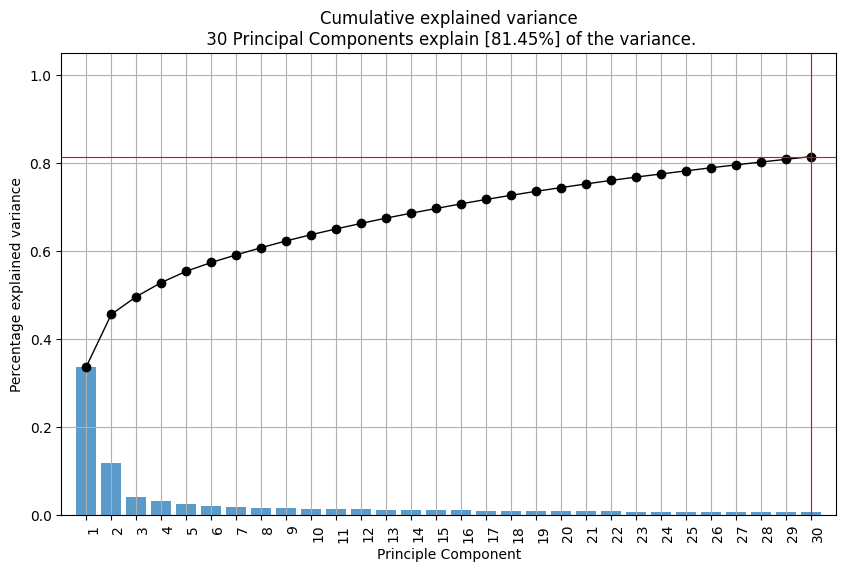

(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 30 Principal Components explain [81.45%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 640x480 with 0 Axes>

In [12]:
# df = pd.read_csv("lysozyme_rmsds.csv", header=0, index_col=0)
model = pca(n_components=30, normalize=True)
results = model.fit_transform(df)
model.plot(figsize=(10, 6))

**We are seeing that 30 components explain [81.45%] of the variance**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [172] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [172] unique colors! Available unique colors: [9].


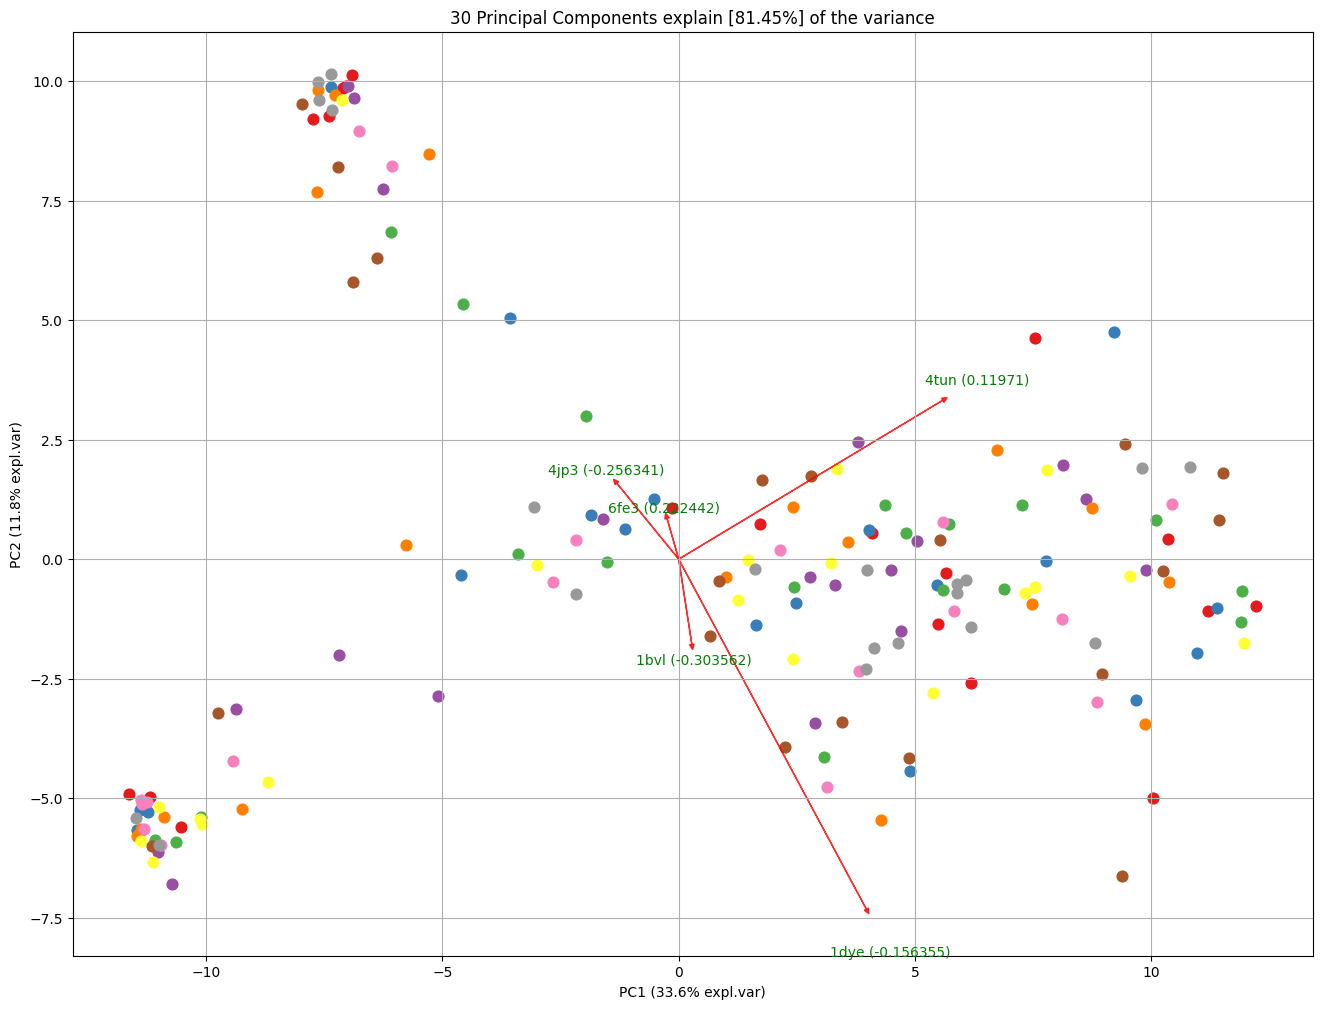

(<Figure size 1600x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'30 Principal Components explain [81.45%] of the variance'}, xlabel='PC1 (33.6% expl.var)', ylabel='PC2 (11.8% expl.var)'>)

In [13]:
model.biplot(n_feat=5, legend=False, figsize=(16, 12), label=False)


### Conclusion

We can see that MDS performs better for both manhattan and euclid. On the other hand in PCA, first PC explains 33.6% and the second PC 11.8%. 

So using PCA, we did not find any clear cluster of the lysozyme. Rather MDS gets a better cluster result.